# Loading and Preprocessing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.1,
    zoom_range=0.3,
)
image_generator_test = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
train_data = image_generator.flow_from_directory(
    'data/train_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 550 images belonging to 2 classes.


In [5]:
test_data = image_generator_test.flow_from_directory(
    'data/test_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 74 images belonging to 2 classes.


In [25]:
unique_labels, counts = np.unique(train_data.classes, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Class {label}: {count} examples")

Class 0: 197 examples
Class 1: 353 examples


As we see our data is imblance so based on classes weightes , we can solve this problem.

In [35]:
unique_labels = np.unique(train_data.classes)
weights = compute_class_weight('balanced', classes=unique_labels, y=train_data.classes)
class_weights = dict(zip(np.unique(train_data.classes), weights))
class_weights

{0: 1.3959390862944163, 1: 0.7790368271954674}

# Model Generation

In [36]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

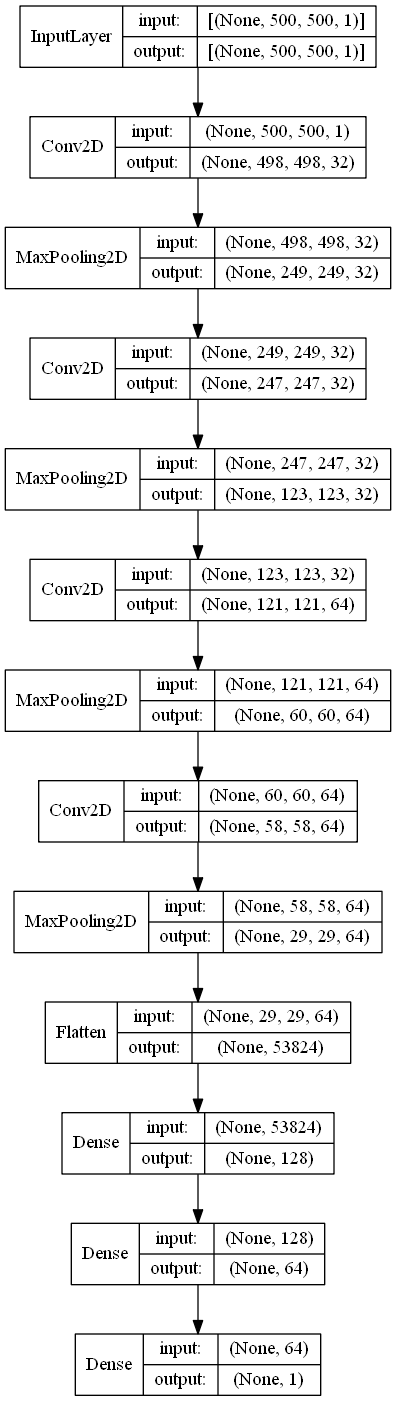

In [38]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [53]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=4, factor=0.2, min_lr=0.001)
mch = ModelCheckpoint('mymodel.h5', monitor='val_loss', mode='min', save_best_only=True)

In [54]:
history = model.fit(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=test_data, validation_steps=len(test_data), callbacks=[es, rlrop , mch], class_weight=class_weights)

Epoch 1/30
11/11 [==============================] - 68s 6s/step - loss: 0.2691 - accuracy: 0.8836 - val_loss: 0.3547 - val_accuracy: 0.8243 - lr: 0.0010
Epoch 2/30
11/11 [==============================] - 70s 6s/step - loss: 0.2432 - accuracy: 0.8909 - val_loss: 0.3084 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 3/30
11/11 [==============================] - 70s 6s/step - loss: 0.2447 - accuracy: 0.9000 - val_loss: 0.3116 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 4/30
11/11 [==============================] - 71s 6s/step - loss: 0.2635 - accuracy: 0.8836 - val_loss: 0.3307 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 5/30
11/11 [==============================] - 70s 6s/step - loss: 0.2514 - accuracy: 0.8891 - val_loss: 0.2941 - val_accuracy: 0.8784 - lr: 0.0010
Epoch 6/30
11/11 [==============================] - 71s 6s/step - loss: 0.2607 - accuracy: 0.8764 - val_loss: 0.3043 - val_accuracy: 0.8919 - lr: 0.0010
Epoch 7/30
11/11 [==============================] - 70s 6s/step - loss: 0.2442 - a

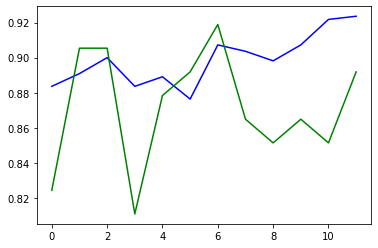

In [55]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')